## Importing Libraries

In [ ]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

## Creating an audio signal

In [ ]:
import numpy as np
sr = 22050 # sample rate
T = 5.0 # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False)
x = 0.5 * np.sin(2*np.pi*220*t)

import IPython.display as ipd
ipd.Audio(x, rate=sr)

## Loading the audio file

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import librosa
audio_path = '/content/drive/MyDrive/Colab Notebooks/Emotion-Recognition-from-Speech/ravdess/train/Actor_09/03-01-02-01-01-02-09.wav'

## Feature Extraction

In [ ]:
import IPython.display as ipd
x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

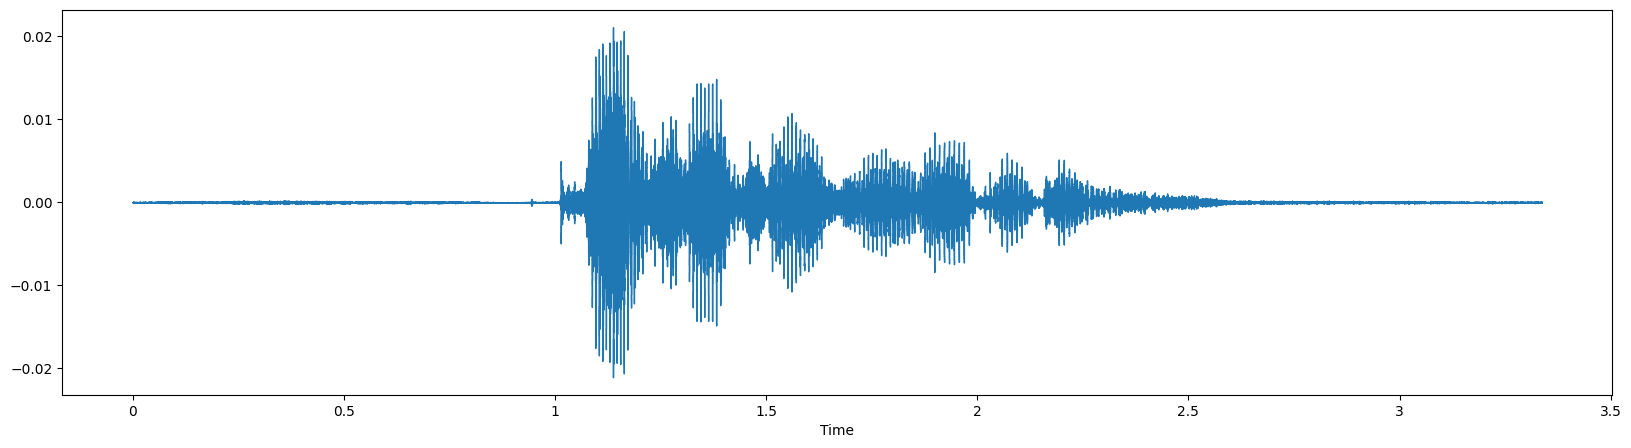

In [ ]:
#Plot the signal
plt.figure(figsize=(20,5))
librosa.display.waveshow(x, sr=sr)

## Zero-Crossing Rate
- It is basically the rate at which a signal changes from positive to zero to negative or from negative to zero to positive.

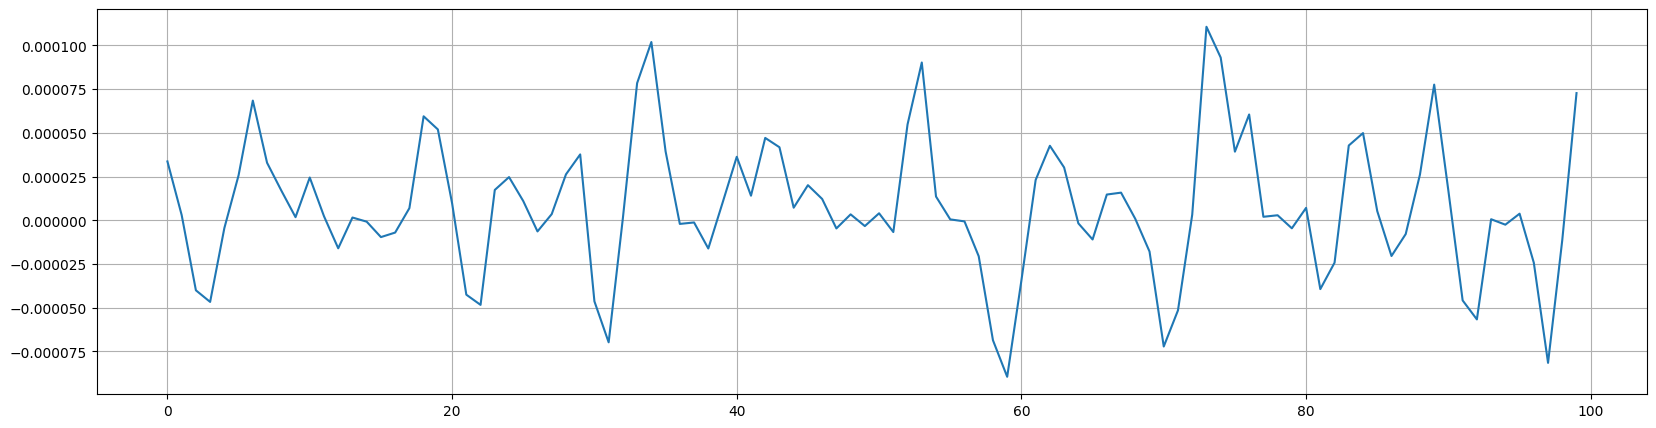

In [ ]:
# Zooming in

n0 = 9000
n1 = 9100
plt.figure(figsize=(20,5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
# Counting the zero-crossings

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [ ]:
print(sum(zero_crossings))

38


In [ ]:
# Counting zero crossings for the entire signal

print(sum(librosa.zero_crossings(x, pad=False)))
librosa.zero_crossings(x, pad=False).shape

21649


(73574,)

## Spectral Centroid
- It is basically the center of 'gravity' of the spectrum. It is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located.

Perceptually, it has a rodbust connection with the impression of 'brightness of a sound'.

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(144,)

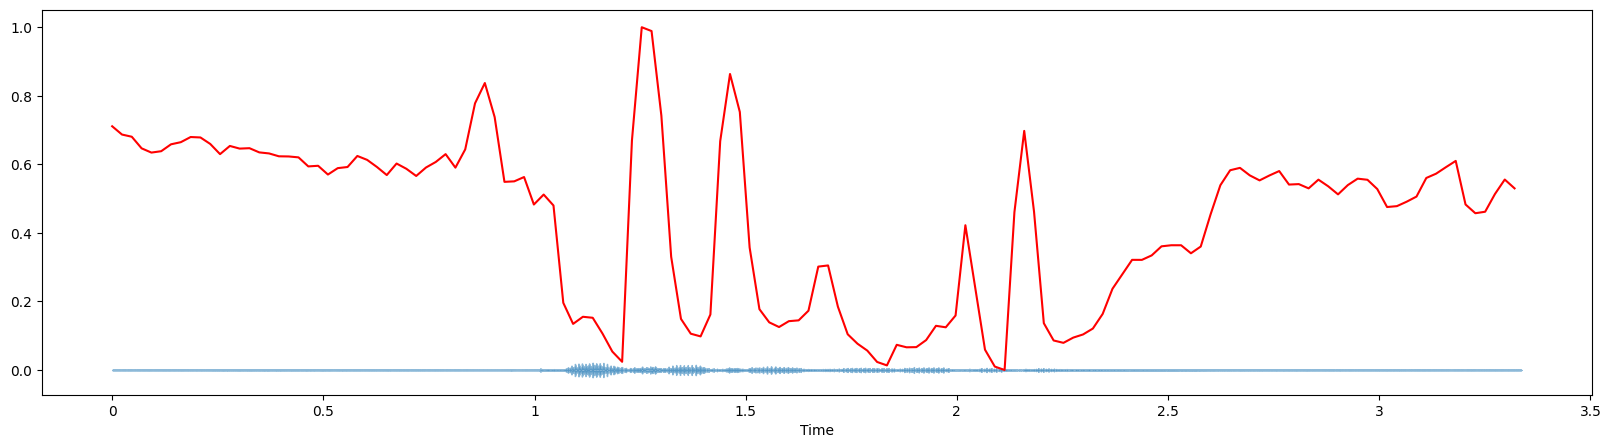

In [ ]:
from sklearn import preprocessing

# computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualization
def normalize(x, axis=0):
  return preprocessing.minmax_scale(x, axis=axis)

# Plotting the spectral centroid along with the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.5)
plt.plot(t, normalize(spectral_centroids), color='r')

## Spectral Rolloff

- Rolloff frequency is the frequency below which a specified percentage of the total spectral energy lies.

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.

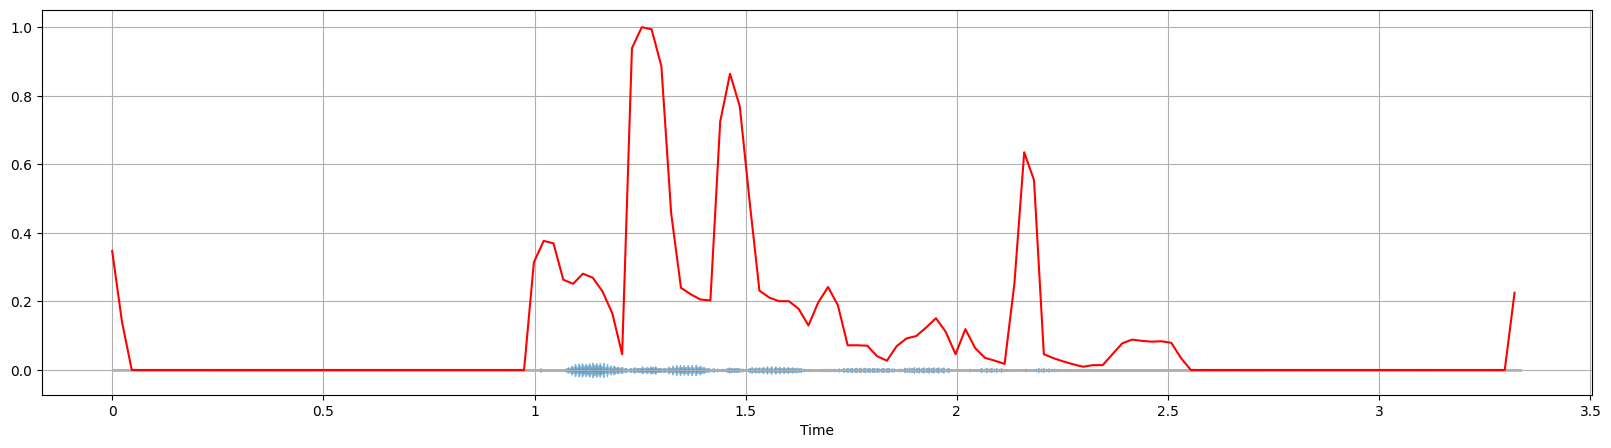

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.5)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

## Spectral Bandwidth
-librosa.feature.spectral_bandwidth computes the order - p spectral bandwidth:

$
(∑_k S(k)(f(k) - f_c)^p)^\frac{1}{p}
$

where $S(k)$ is the spectral magnitude at frequency bin k,
$f(k)$ is the frequency at bin $k$, and $f_c$ is the spectral centroid.

where $p=2$, this is like a weighted standard deviation.

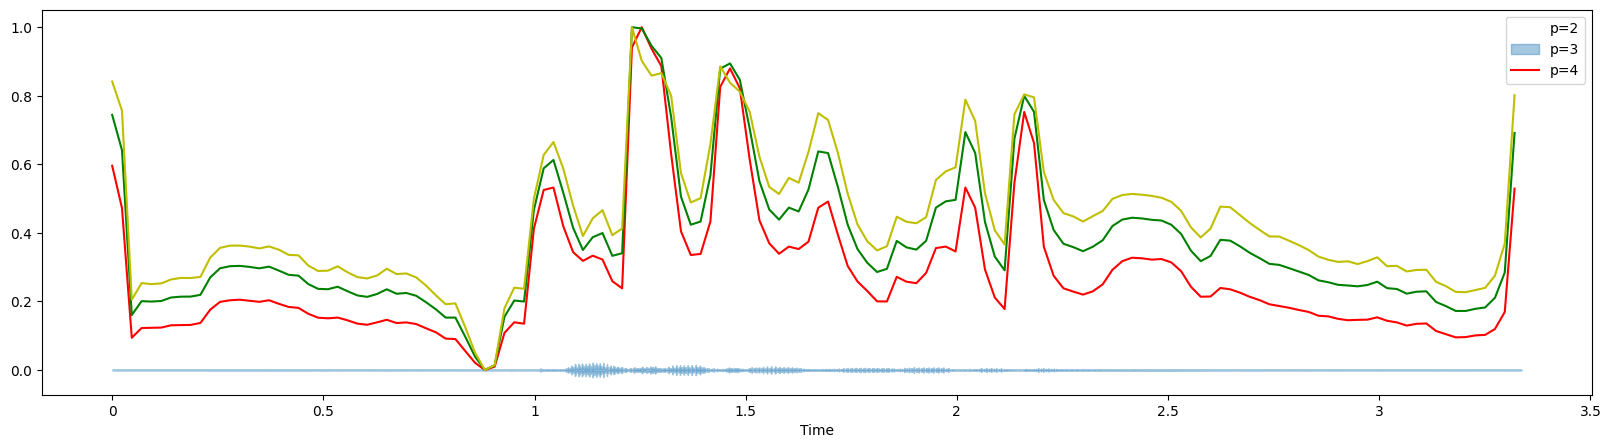

In [ ]:
plt.figure(figsize=(20,5))

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p=2', 'p=3', 'p=4'))

## Spectral Contrast

-Spectral contrast considers the spectral peak, the spectral valley, and their difference in each frequency subband.

librosa.feature.spectral_contrast computes the spectral contrast for six subbands for each time frame

In [ ]:
spectral_contrast = librosa.feature.spectral_contrast(y=x, sr=sr)
spectral_contrast.shape

(7, 144)

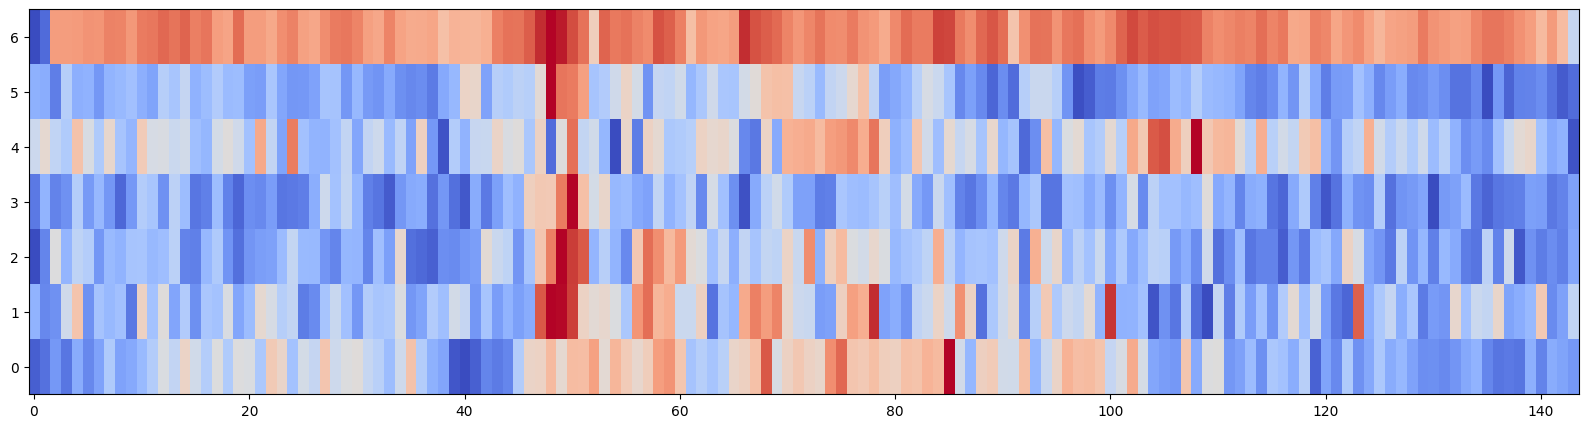

In [ ]:
plt.figure(figsize=(20,5))
plt.imshow(
    normalize(spectral_contrast, axis=1),
    aspect='auto',
    origin='lower',
    cmap='coolwarm'
)

## MFCC (Mel-Frequency Cepstral Coefficients)

-In sound proecessing, it is a representation of the short term power spectrum of a sound based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency.

It provides us enough frequency channels to analyze the audio.

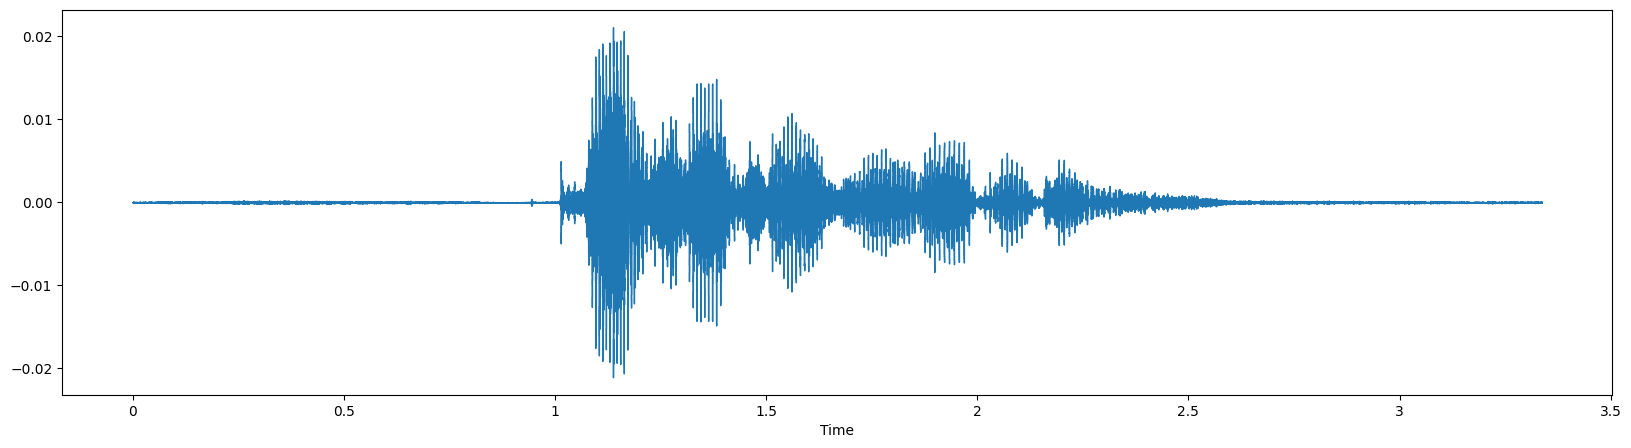

In [ ]:
plt.figure(figsize=(20,5))
x, sr = librosa.load(audio_path)
librosa.display.waveshow(y=x, sr=sr)

(20, 144)


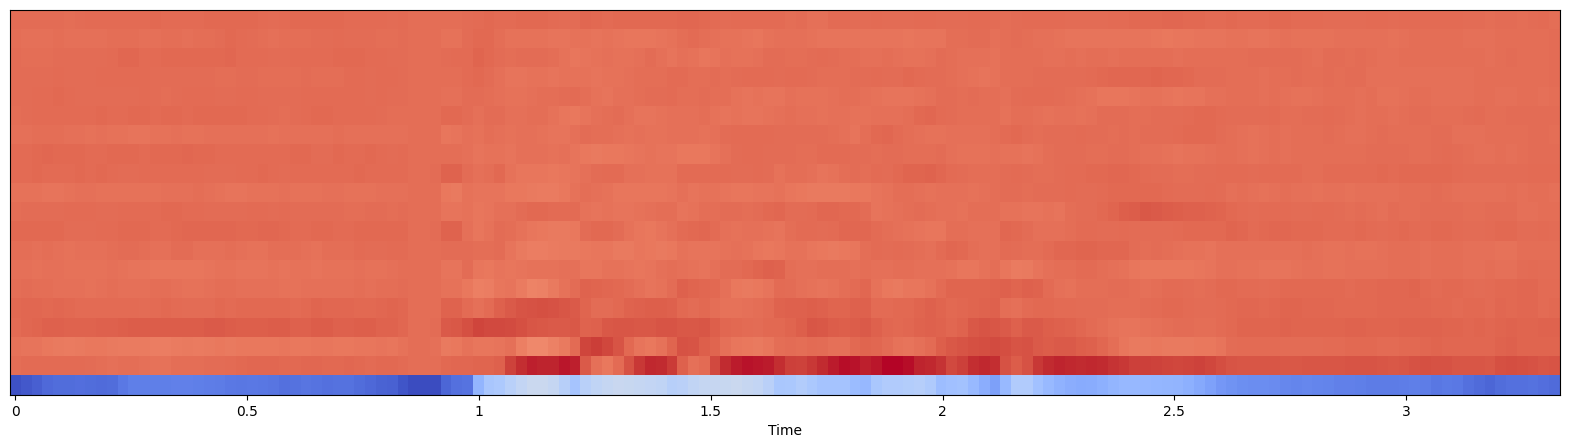

In [ ]:
# MFCC

plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

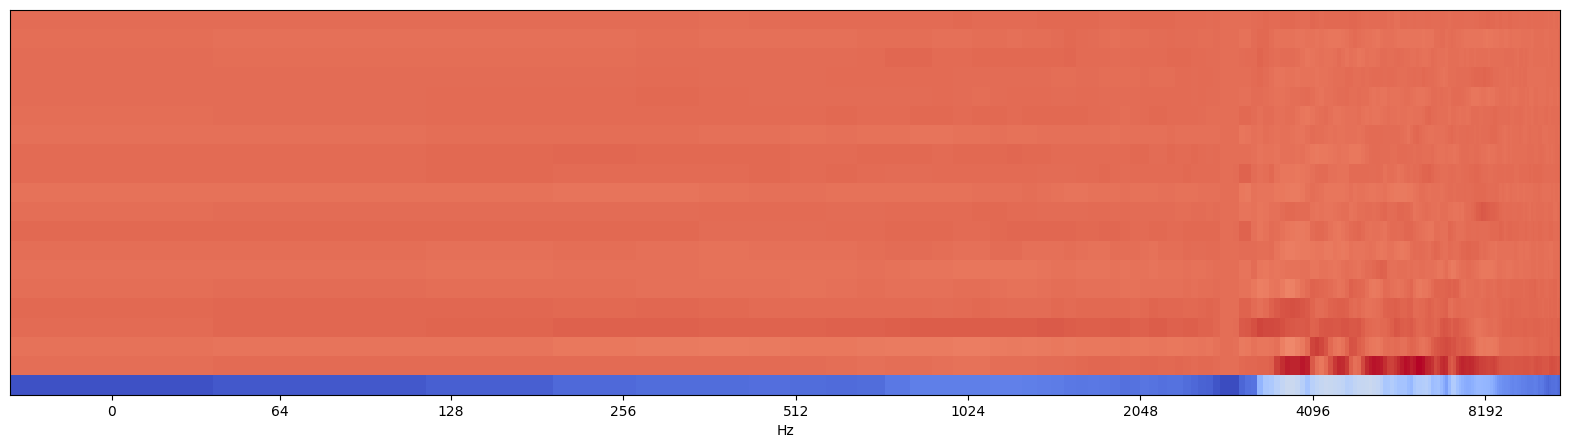

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='log')

## Feature Scaling

-Scaling the MFCCs such that each coefficients dimension has zero mean and unit variance.

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-4.9670539e-09  0.0000000e+00  0.0000000e+00  0.0000000e+00
  3.3113692e-09  1.3245477e-08  0.0000000e+00  1.3245477e-08
  3.3113692e-09 -6.6227384e-09  0.0000000e+00  0.0000000e+00
  1.3245477e-08  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -9.9341078e-09 -1.3245477e-08  0.0000000e+00  0.0000000e+00]
[1.        1.        1.        1.        1.        1.0000001 1.
 1.        1.        1.        1.        1.        1.        1.
 1.0000001 0.9999999 1.        1.0000002 1.        1.0000001]


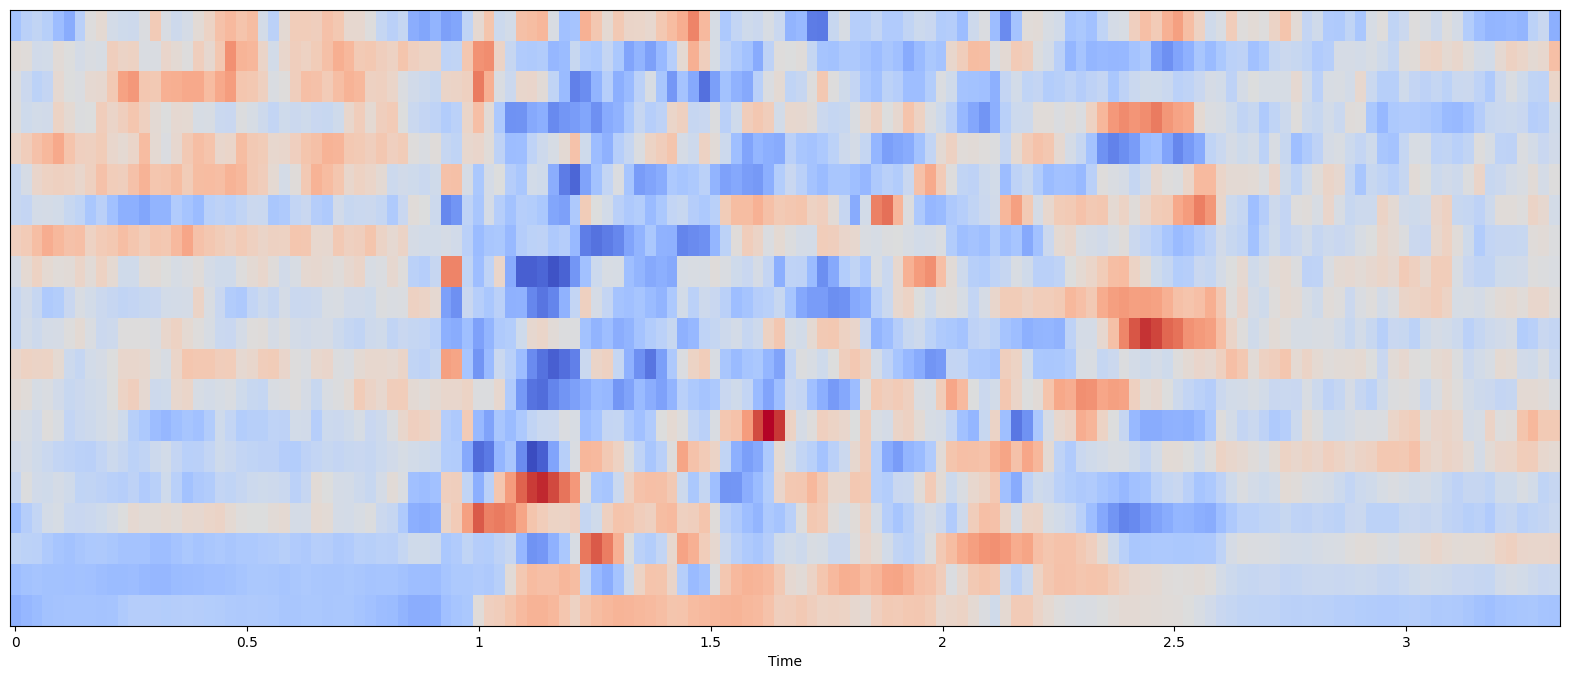

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

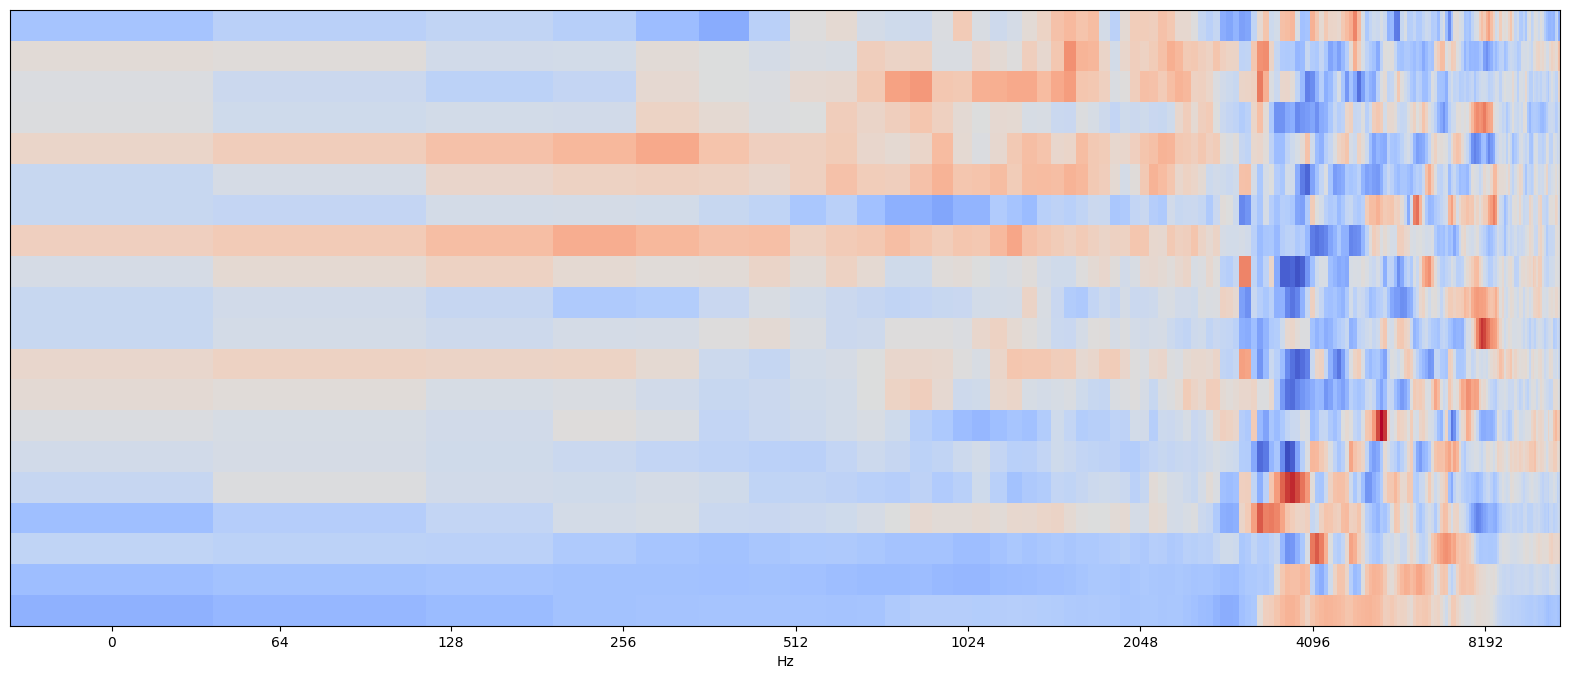

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='log')

## Chroma Frequencies
-Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

In [ ]:
# Loading the file

x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

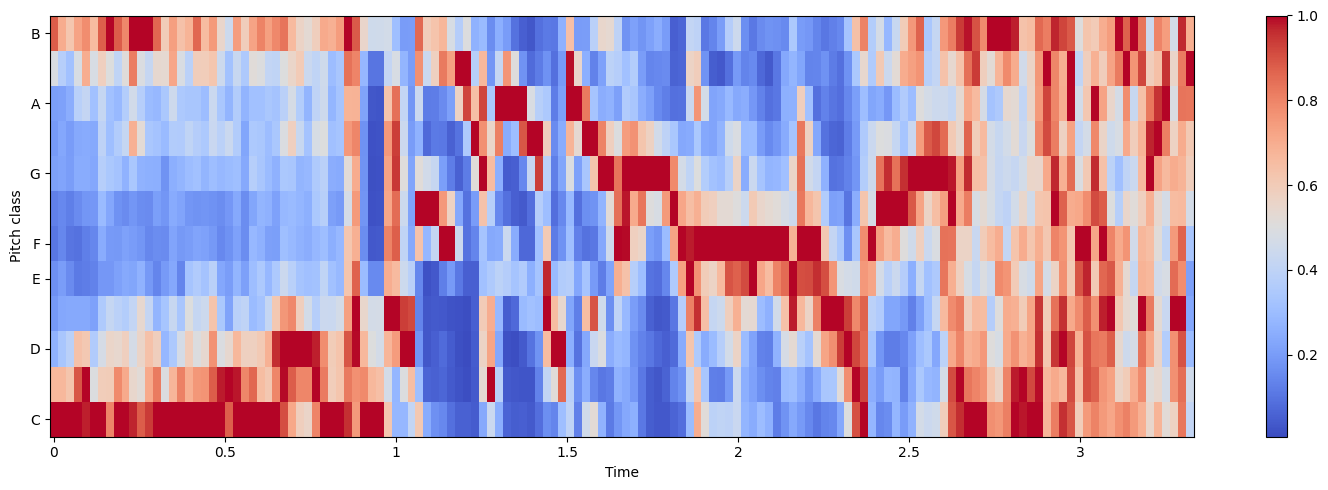

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()
plt.tight_layout()
plt.show()

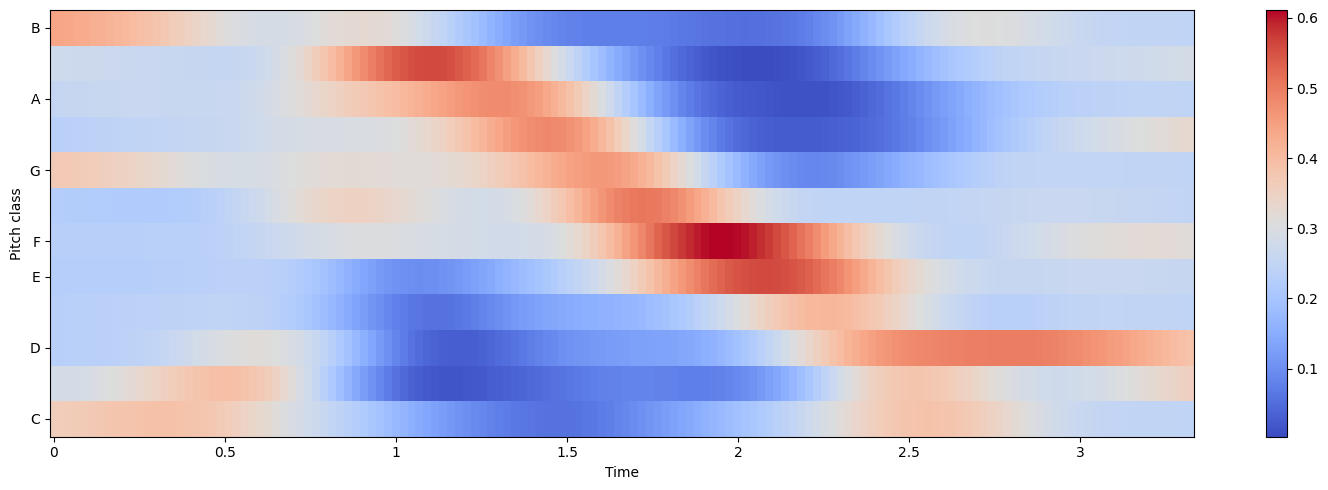

In [ ]:
# Using chroma energy distribution normalized statistics (CENS),
# typically used to identify similarity between different interpretations of the music given.

hop_length = 512
chromagram = librosa.feature.chroma_cens(y=x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()
plt.tight_layout()
plt.show()

## Extracting Features

In [ ]:
import sklearn

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

def features(x, sr):
    result = np.array([])

    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=x).T, axis=0)
    result=np.hstack((result, zcr.real))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc.real))

    # Chroma_stft
    stft = np.abs(librosa.stft(x))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft.real))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=x, sr=sr).T, axis=0)
    result = np.hstack((result, mel.real))

    # Spectral Centroid
    speCen = np.mean(librosa.feature.spectral_centroid(y=x, sr=sr)[0])
    result = np.hstack((result, speCen.real))

    # Spectral Rolloff
    specRollOff = np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr))
    result = np.hstack((result, specRollOff.real))

    # Fourier Tempogram
    fourierTempgram = np.mean(librosa.feature.fourier_tempogram(y=x, sr=sr))
    result = np.hstack((result, fourierTempgram.real))

    return result

In [ ]:
features(x, sr)

array([ 2.90072971e-01, -7.12009888e+02,  6.44487457e+01,  1.38777328e+00,
        2.92869034e+01,  1.51224651e+01,  7.20019042e-01, -7.45956230e+00,
       -4.76869583e+00,  5.13805389e+00,  4.04350901e+00, -7.13059330e+00,
        5.27543020e+00, -8.57501552e-02, -1.96177924e+00,  1.30266762e+00,
       -1.57273996e+00,  2.10465407e+00,  8.15362692e-01, -5.69058514e+00,
        7.61829805e+00,  8.11591685e-01,  7.60857701e-01,  7.34249771e-01,
        7.00759172e-01,  6.26413345e-01,  6.27541304e-01,  6.29523873e-01,
        6.79960370e-01,  6.86577559e-01,  6.58903658e-01,  6.75308466e-01,
        7.62794912e-01,  1.02760778e-05,  3.98137723e-04,  9.08553973e-03,
        1.32125849e-02,  4.58522793e-03,  1.31339685e-03,  3.14093754e-03,
        9.06227343e-03,  1.35938711e-02,  2.90065911e-03,  6.22737105e-04,
        2.21126270e-03,  7.81751052e-03,  1.15620187e-02,  3.71518149e-03,
        3.21706664e-03,  2.76419497e-03,  3.22223036e-03,  2.35187029e-03,
        6.62791950e-04,  

In [ ]:
len(features(x, sr))

164

## Loading training and testing data

In [ ]:
import numpy as np
import os

def extract_emotion_label(file_name):
    """
    Extract emotion and emotional intensity from the file name based on RAVDESS naming convention.
    :param file_name: Name of the audio file (e.g., '03-01-03-01-01-01-01.wav')
    :return: label (emotion, emotional_intensity, gender)
    """

    # Split the file name by hyphen
    parts = file_name.split('.')[0].split('-')

    # Emotion and emotional intensity are at specific positions
    emotion_code = parts[2]
    intensity_code = parts[3]
    actor = int(parts[6])

    # Mapping for emotions based on the RAVDESS convention
    emotion_dict = {
        '01': 'neutral',
        '02': 'calm',
        '03': 'happy',
        '04': 'sad',
        '05': 'angry',
        '06': 'fearful',
        '07': 'disgust',
        '08': 'surprised'
    }

    # Mapping for emotional intensity
    intensity_dict = {
        '01': 'normal',
        '02': 'strong'
    }

    # Extract emotion, intensity and gender based on codes
    emotion = emotion_dict.get(emotion_code, 'unkown')
    intensity = intensity_dict.get(intensity_code, 'unkown')
    gender = 'male' if actor%2!=0 else 'female'
    label = f"{emotion}+{intensity}+{gender}"

    return label

def get_data(data_dir):
    """
    Load data from the directory structure and return audio paths, labels and emotional intensity.
    :param data_dir: The root directory of the dataset
    :return: data (list of file paths), labels [list of [emotion, intensity, gender]]
    """
    data = []
    labels = []

    for actor_dir in os.listdir(data_dir):
        actor_path = os.path.join(data_dir, actor_dir)
        if os.path.isdir(actor_path):
            for file in os.listdir(actor_path):
                if file.endswith(".wav"):
                    file_path = os.path.join(actor_path, file)
                    label = extract_emotion_label(file)
                    data.append(file_path)
                    labels.append(label)

    return data, np.array(labels)

def load_train_test_data(base_dir):
    """
    Load train and test datasets.
    :param base_dir: The base directory of the RAVDESS dataset (containing 'train' and 'test' folders)
    :return: Train and test data, labels
    """
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')

    # Load train data
    train_data, train_labels = get_data(train_dir)

    # Load test data
    test_data, test_labels = get_data(test_dir)

    return train_data, train_labels, test_data, test_labels

In [ ]:
train_data, train_labels, test_data, test_labels = load_train_test_data(base_dir='/content/drive/MyDrive/Colab Notebooks/Emotion-Recognition-from-Speech/ravdess')

In [ ]:
train_features = []
test_features = []
for path in train_data:
  x, sr = librosa.load(path)
  train_features.append(features(x, sr))

for path in test_data:
  x, sr = librosa.load(path)
  test_features.append(features(x, sr))

train_features = np.array(train_features)
test_features = np.array(test_features)

In [ ]:
train_features.shape

(1440, 164)

In [ ]:
test_features.shape

(1440, 164)

In [ ]:
len(train_data)

1440

In [ ]:
len(test_data)

1440

In [ ]:
X_column_names = [f"Feature_{i+1}" for i in range(len(test_features[0]))]
y_column_names = ['label']

In [ ]:
import pandas as pd

X_train_df = pd.DataFrame(train_features, columns=X_column_names)
X_test_df = pd.DataFrame(test_features, columns=X_column_names)
y_train_df = pd.DataFrame(train_labels, columns=y_column_names)
y_test_df = pd.DataFrame(test_labels, columns=y_column_names)

In [ ]:
X_train_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_155,Feature_156,Feature_157,Feature_158,Feature_159,Feature_160,Feature_161,Feature_162,Feature_163,Feature_164
0,0.266808,-509.529572,24.022825,-14.907886,-0.697563,-11.522958,-9.965440,-11.921485,-13.617157,-3.646201,...,0.001409,0.001355,0.000793,0.000972,0.001552,0.001190,1.153455e-04,3415.965681,6199.068541,0.536707
1,0.413118,-730.670471,38.349815,2.674319,9.384073,-5.979620,-3.029608,-11.018359,-9.151864,-7.464394,...,0.000024,0.000024,0.000019,0.000015,0.000011,0.000005,4.307079e-07,3595.106464,6334.114193,0.499593
2,0.345513,-683.846619,41.367165,-2.767712,1.023483,-4.020317,-7.462221,-11.155664,-7.080593,-11.429027,...,0.000060,0.000044,0.000041,0.000028,0.000022,0.000016,1.913279e-06,3434.880446,6269.021037,0.470204
3,0.277406,-578.768799,50.480259,-11.826157,3.023091,-10.381796,-13.910265,-5.369832,-13.442755,-10.330565,...,0.000218,0.000273,0.000396,0.000903,0.001079,0.000450,4.981600e-05,2765.004332,5179.336532,0.582388
4,0.308712,-708.799866,48.700954,1.122221,0.025111,-7.621972,-7.224838,-12.110167,-8.403195,-12.154092,...,0.000053,0.000056,0.000051,0.000021,0.000025,0.000012,7.320705e-07,3130.792541,5595.043945,0.468202


In [ ]:
X_test_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_155,Feature_156,Feature_157,Feature_158,Feature_159,Feature_160,Feature_161,Feature_162,Feature_163,Feature_164
0,0.259445,-592.806824,41.242146,-12.090631,7.786868,-2.870519,-8.808648,-10.195847,-9.718952,-5.995810,...,0.000271,0.000249,0.000285,0.000210,0.000227,0.000161,0.000015,2683.409994,4861.322479,0.485711
1,0.226321,-516.360718,39.638168,-3.954483,8.232257,-6.101250,-7.178853,-5.892061,-9.803116,-7.196022,...,0.002571,0.002386,0.001920,0.001985,0.001977,0.001264,0.000128,2433.574190,4647.416084,0.564933
2,0.261846,-610.137817,55.019863,-13.821911,11.335617,-0.438446,-11.673826,-19.719421,-17.082834,-6.096431,...,0.000126,0.000132,0.000071,0.000099,0.000056,0.000029,0.000004,2804.681857,5125.771697,0.583018
3,0.343216,-579.729919,41.741753,-4.757806,7.500826,0.168015,-9.438590,-12.131509,-8.491423,-6.212281,...,0.001196,0.001072,0.001198,0.000660,0.001047,0.000424,0.000019,3284.205747,6216.542120,0.450895
4,0.353980,-595.400696,51.960423,-8.388943,7.897839,-0.442394,-13.809478,-22.989063,-11.996374,-3.949681,...,0.001044,0.000861,0.000593,0.000493,0.000586,0.000342,0.000023,3196.271033,5673.196544,0.579412


In [ ]:
y_train_df.head()

,label
0,fearful+normal+female
1,calm+normal+female
2,calm+strong+female
3,sad+strong+female
4,calm+strong+female


In [ ]:
y_train_df.value_counts()

,count
label,
angry+normal+female,48
angry+normal+male,48
surprised+strong+female,48
surprised+normal+male,48
surprised+normal+female,48
sad+strong+male,48
sad+strong+female,48
sad+normal+male,48
sad+normal+female,48


In [ ]:
X = pd.concat([X_train_df, X_test_df], ignore_index=True)
y = pd.concat([y_train_df, y_test_df], ignore_index=True)

In [ ]:
dataset = pd.concat([X, y], axis=1)

In [ ]:
dataset.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_156,Feature_157,Feature_158,Feature_159,Feature_160,Feature_161,Feature_162,Feature_163,Feature_164,label
0,0.266808,-509.529572,24.022825,-14.907886,-0.697563,-11.522958,-9.965440,-11.921485,-13.617157,-3.646201,...,0.001355,0.000793,0.000972,0.001552,0.001190,1.153455e-04,3415.965681,6199.068541,0.536707,fearful+normal+female
1,0.413118,-730.670471,38.349815,2.674319,9.384073,-5.979620,-3.029608,-11.018359,-9.151864,-7.464394,...,0.000024,0.000019,0.000015,0.000011,0.000005,4.307079e-07,3595.106464,6334.114193,0.499593,calm+normal+female
2,0.345513,-683.846619,41.367165,-2.767712,1.023483,-4.020317,-7.462221,-11.155664,-7.080593,-11.429027,...,0.000044,0.000041,0.000028,0.000022,0.000016,1.913279e-06,3434.880446,6269.021037,0.470204,calm+strong+female
3,0.277406,-578.768799,50.480259,-11.826157,3.023091,-10.381796,-13.910265,-5.369832,-13.442755,-10.330565,...,0.000273,0.000396,0.000903,0.001079,0.000450,4.981600e-05,2765.004332,5179.336532,0.582388,sad+strong+female
4,0.308712,-708.799866,48.700954,1.122221,0.025111,-7.621972,-7.224838,-12.110167,-8.403195,-12.154092,...,0.000056,0.000051,0.000021,0.000025,0.000012,7.320705e-07,3130.792541,5595.043945,0.468202,calm+strong+female


In [ ]:
dataset.shape

(2880, 165)

In [ ]:
# saving the datframe
dataset.to_csv('dataset.csv', index=False)